In [4]:
# Cell 1 — init (imports + plotting defaults)

import math
from typing import Dict, List, Tuple, Any

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update(
    {
        "figure.dpi": 120,
        "axes.grid": True,
        "grid.alpha": 0.25,
        "axes.spines.top": False,
        "axes.spines.right": False,
    }
)


In [5]:
# Cell 2 — init (helpers)

def df_display(df: pd.DataFrame, title: str = "") -> None:
    if title:
        print(title)
    display(df)

def plot_line(
    x,
    ys: Dict[str, List[float]],
    title: str,
    xlabel: str,
    ylabel: str,
    *,
    marker: str = "o",
) -> None:
    plt.figure(figsize=(9, 4))
    for name, y in ys.items():
        plt.plot(x, y, marker=marker, linewidth=1.5, label=name)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_bar(
    x,
    y,
    title: str,
    xlabel: str,
    ylabel: str,
    *,
    rotate_x: bool = False,
) -> None:
    plt.figure(figsize=(9, 4))
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if rotate_x:
        plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

def argmin(items: List[Dict[str, Any]], key: str) -> Dict[str, Any]:
    return min(items, key=lambda d: d[key])

def argmax(items: List[Dict[str, Any]], key: str) -> Dict[str, Any]:
    return max(items, key=lambda d: d[key])


Prefix/Suffix — soft prompt training (sample run)


,step,loss,ce
0,0,1.0149,1.025142
1,25,1.2324,1.242515
2,50,1.3405,1.350612
3,75,0.9909,1.000975
4,100,1.1603,1.170305
5,125,0.8686,0.878658
6,150,0.7446,0.754695
7,175,0.7676,0.777780
8,200,0.6841,0.694228
9,225,0.5782,0.588355


Prefix/Suffix — final candidate metrics per attempt


,attempt,ce,exactk,tokk,prompt
0,1,0.6316,0.1,0.241,Subject:** \nCatsSyl Cats
1,2,0.5720,0.1,0.140,speakingGEBURTSDATUM earthlyExample Cats
2,3,1.3417,0.0,0.112,โน 북Nek \nConner ketones
3,4,1.4807,0.0,0.061,ग्राहक\nProyecto बचAPK Kung
4,5,1.2361,0.0,0.090,\nग्राहकlässtsetBlock catalyICOLON
5,6,0.6274,0.0,0.165,MeowGEBURTSDATUMproper Cats:
6,7,1.3660,0.0,0.061,এ \nrestrained 主張℃ Pate
7,8,1.1992,0.0,0.094,hallbatoдко\n 可在fascination
8,9,1.4828,0.0,0.101,скоре ban月\n からcategorized cytochrome
9,10,1.2728,0.0,0.101,\nкредиPUBLICškin BaxterICOLON


Best CE: {'attempt': 2, 'ce': 0.572, 'exactk': 0.1, 'tokk': 0.14, 'prompt': 'speakingGEBURTSDATUM earthlyExample Cats'}
Best tok@K: {'attempt': 1, 'ce': 0.6316, 'exactk': 0.1, 'tokk': 0.241, 'prompt': 'Subject:** \nCatsSyl Cats'}


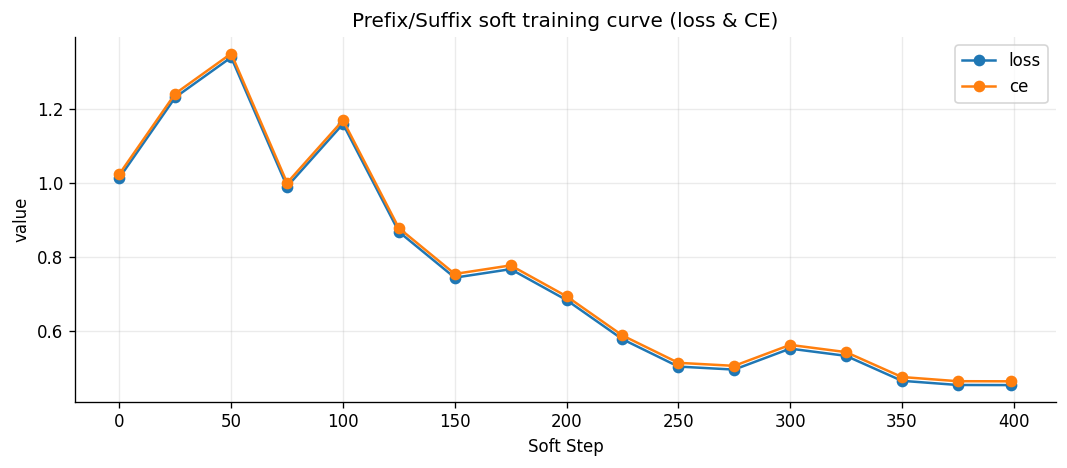

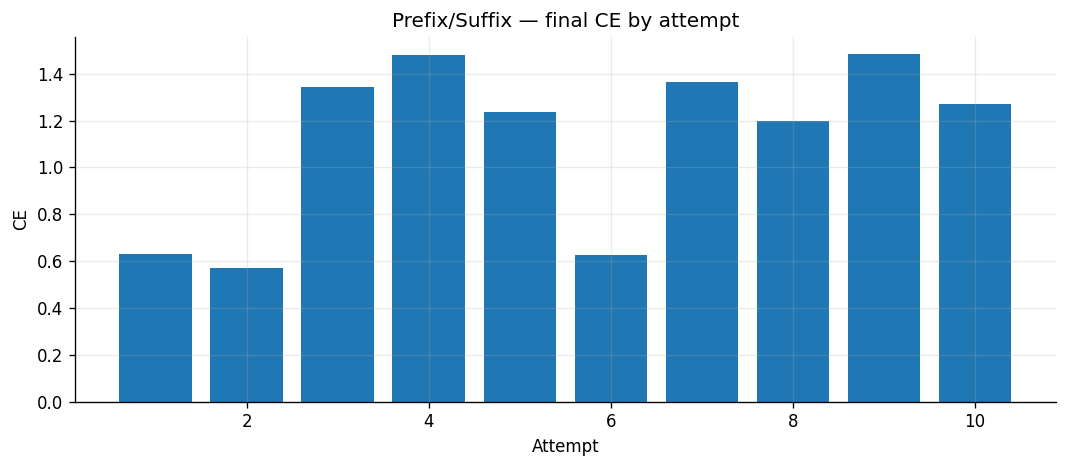

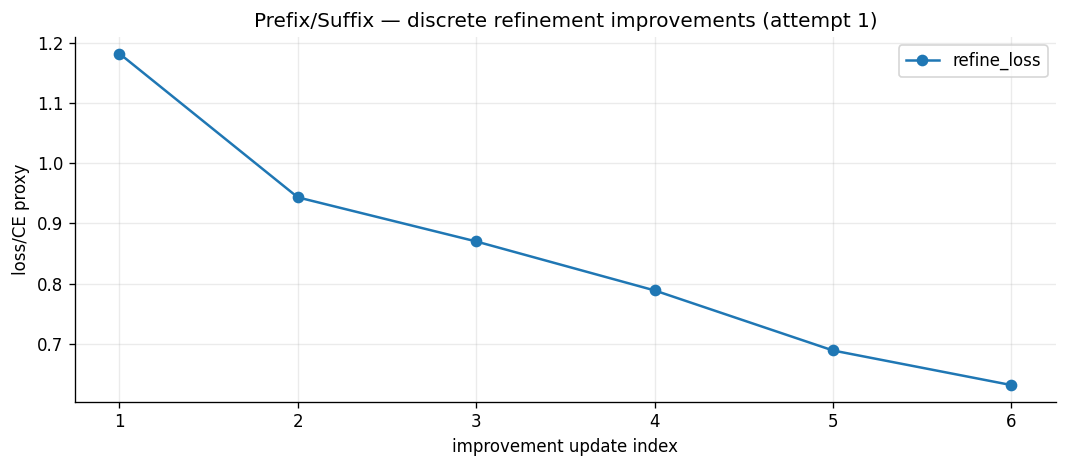

In [6]:
# Cell 3 — notebook: prefix_suffix_optimizer (training curves + attempt outcomes)

prefix_suffix = {
    "soft_train": {
        "steps": [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 399],
        "loss": [
            1.0149, 1.2324, 1.3405, 0.9909, 1.1603, 0.8686, 0.7446, 0.7676, 0.6841,
            0.5782, 0.5042, 0.4960, 0.5527, 0.5332, 0.4657, 0.4544, 0.4541
        ],
        "ce": [
            1.0251418, 1.2425153, 1.3506116, 1.0009747, 1.1703049, 0.8786584, 0.7546949,
            0.7777804, 0.6942280, 0.5883546, 0.5143426, 0.5061175, 0.5627846, 0.5433112,
            0.4759127, 0.4646250, 0.4642899
        ],
    },
    "attempt_summary": [
        {"attempt": 1, "ce": 0.6316, "exactk": 0.100, "tokk": 0.241, "prompt": "Subject:** \nCatsSyl Cats"},
        {"attempt": 2, "ce": 0.5720, "exactk": 0.100, "tokk": 0.140, "prompt": "speakingGEBURTSDATUM earthlyExample Cats"},
        {"attempt": 3, "ce": 1.3417, "exactk": 0.000, "tokk": 0.112, "prompt": "  โน 북Nek \nConner ketones"},
        {"attempt": 4, "ce": 1.4807, "exactk": 0.000, "tokk": 0.061, "prompt": "  ग्राहक\nProyecto बचAPK Kung"},
        {"attempt": 5, "ce": 1.2361, "exactk": 0.000, "tokk": 0.090, "prompt": " \nग्राहकlässtsetBlock catalyICOLON"},
        {"attempt": 6, "ce": 0.6274, "exactk": 0.000, "tokk": 0.165, "prompt": "MeowGEBURTSDATUMproper Cats:"},
        {"attempt": 7, "ce": 1.3660, "exactk": 0.000, "tokk": 0.061, "prompt": " এ \nrestrained  主張℃ Pate"},
        {"attempt": 8, "ce": 1.1992, "exactk": 0.000, "tokk": 0.094, "prompt": " hallbatoдко\n 可在fascination"},
        {"attempt": 9, "ce": 1.4828, "exactk": 0.000, "tokk": 0.101, "prompt": "скоре ban月\n からcategorized cytochrome"},
        {"attempt": 10, "ce": 1.2728, "exactk": 0.000, "tokk": 0.101, "prompt": " \nкредиPUBLICškin BaxterICOLON"},
    ],
    "refine_improvements_attempt1": {
        # sequence of improvements during discrete refinement for attempt 1 (in order observed)
        "update_idx": [1, 2, 3, 4, 5, 6],
        "loss": [1.1821862, 0.9433925, 0.8701335, 0.7887989, 0.6890621, 0.6315801],
        "pass": [1, 1, 1, 1, 2, 3],
    },
}

# Tables
df_soft = pd.DataFrame(
    {"step": prefix_suffix["soft_train"]["steps"],
     "loss": prefix_suffix["soft_train"]["loss"],
     "ce": prefix_suffix["soft_train"]["ce"]}
)
df_attempts = pd.DataFrame(prefix_suffix["attempt_summary"]).sort_values("attempt")

best_ce = argmin(prefix_suffix["attempt_summary"], "ce")
best_tokk = argmax(prefix_suffix["attempt_summary"], "tokk")

df_display(df_soft, "Prefix/Suffix — soft prompt training (sample run)")
df_display(df_attempts, "Prefix/Suffix — final candidate metrics per attempt")
print("Best CE:", best_ce)
print("Best tok@K:", best_tokk)

# Plots
plot_line(
    df_soft["step"].tolist(),
    {"loss": df_soft["loss"].tolist(), "ce": df_soft["ce"].tolist()},
    title="Prefix/Suffix soft training curve (loss & CE)",
    xlabel="Soft Step",
    ylabel="value",
)

plot_bar(
    df_attempts["attempt"].tolist(),
    df_attempts["ce"].tolist(),
    title="Prefix/Suffix — final CE by attempt",
    xlabel="Attempt",
    ylabel="CE",
)

# Refinement improvement trace (attempt 1)
ref = prefix_suffix["refine_improvements_attempt1"]
plot_line(
    ref["update_idx"],
    {"refine_loss": ref["loss"]},
    title="Prefix/Suffix — discrete refinement improvements (attempt 1)",
    xlabel="improvement update index",
    ylabel="loss/CE proxy",
)


Prefix/Suffix — soft prompt training (sample run)


,step,loss,ce
0,0,1.0149,1.025142
1,25,1.2324,1.242515
2,50,1.3405,1.350612
3,75,0.9909,1.000975
4,100,1.1603,1.170305
5,125,0.8686,0.878658
6,150,0.7446,0.754695
7,175,0.7676,0.777780
8,200,0.6841,0.694228
9,225,0.5782,0.588355


Prefix/Suffix — final candidate metrics per attempt


,attempt,ce,exactk,tokk,prompt
0,1,0.6316,0.1,0.241,Subject:** \nCatsSyl Cats
1,2,0.5720,0.1,0.140,speakingGEBURTSDATUM earthlyExample Cats
2,3,1.3417,0.0,0.112,โน 북Nek \nConner ketones
3,4,1.4807,0.0,0.061,ग्राहक\nProyecto बचAPK Kung
4,5,1.2361,0.0,0.090,\nग्राहकlässtsetBlock catalyICOLON
5,6,0.6274,0.0,0.165,MeowGEBURTSDATUMproper Cats:
6,7,1.3660,0.0,0.061,এ \nrestrained 主張℃ Pate
7,8,1.1992,0.0,0.094,hallbatoдко\n 可在fascination
8,9,1.4828,0.0,0.101,скоре ban月\n からcategorized cytochrome
9,10,1.2728,0.0,0.101,\nкредиPUBLICškin BaxterICOLON


Best CE: {'attempt': 2, 'ce': 0.572, 'exactk': 0.1, 'tokk': 0.14, 'prompt': 'speakingGEBURTSDATUM earthlyExample Cats'}
Best tok@K: {'attempt': 1, 'ce': 0.6316, 'exactk': 0.1, 'tokk': 0.241, 'prompt': 'Subject:** \nCatsSyl Cats'}


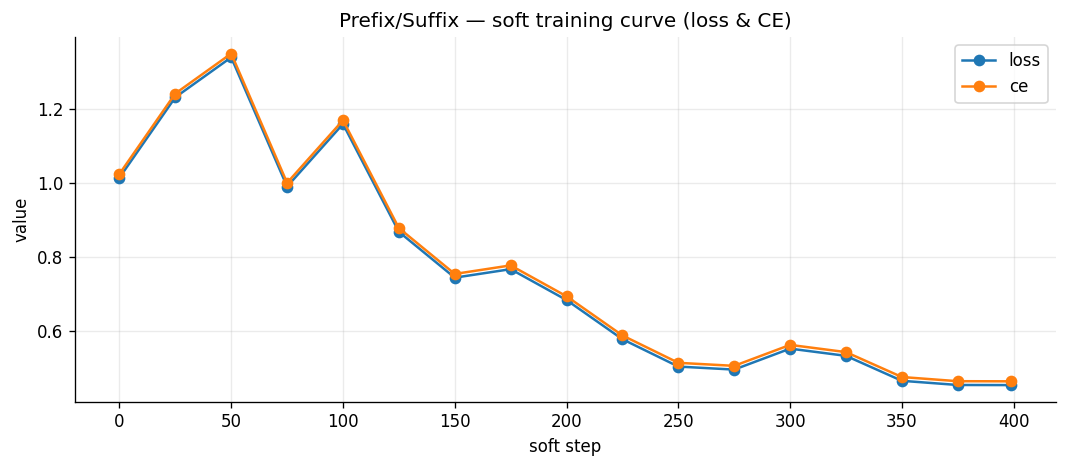

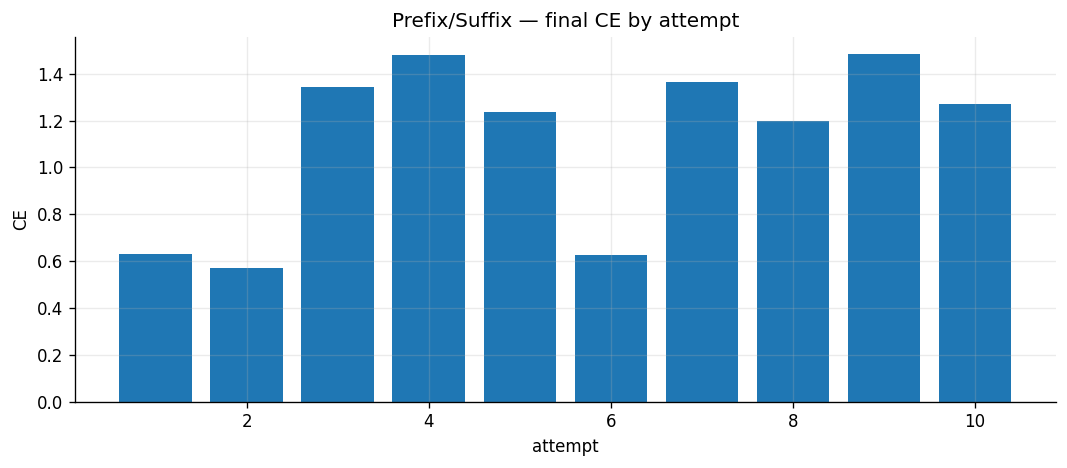

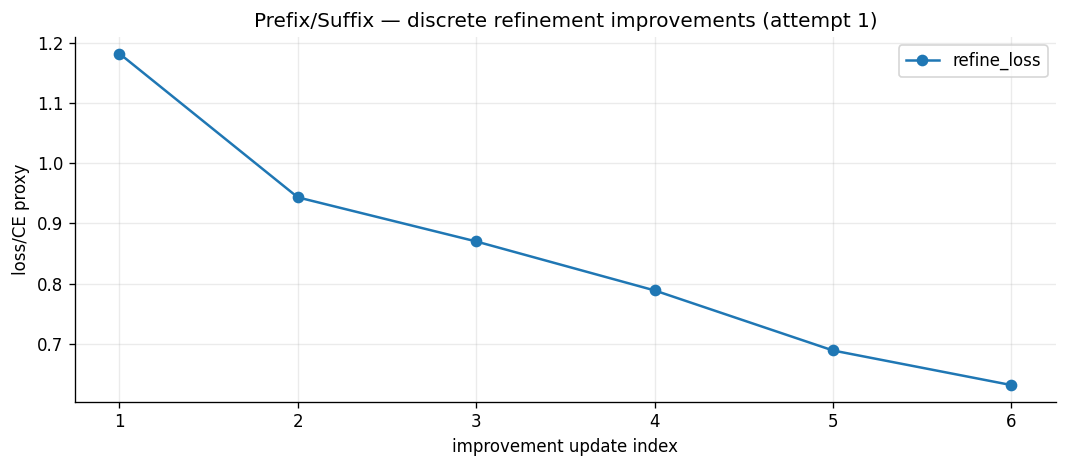

In [7]:
# Cell 3 — notebook: prefix_suffix_optimizer (training curves + attempt outcomes)

prefix_suffix = {
    "soft_train": {
        "steps": [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 399],
        "loss": [
            1.0149, 1.2324, 1.3405, 0.9909, 1.1603, 0.8686, 0.7446, 0.7676, 0.6841,
            0.5782, 0.5042, 0.4960, 0.5527, 0.5332, 0.4657, 0.4544, 0.4541
        ],
        "ce": [
            1.0251418, 1.2425153, 1.3506116, 1.0009747, 1.1703049, 0.8786584, 0.7546949,
            0.7777804, 0.6942280, 0.5883546, 0.5143426, 0.5061175, 0.5627846, 0.5433112,
            0.4759127, 0.4646250, 0.4642899
        ],
    },
    "attempt_summary": [
        {"attempt": 1, "ce": 0.6316, "exactk": 0.100, "tokk": 0.241, "prompt": "Subject:** \nCatsSyl Cats"},
        {"attempt": 2, "ce": 0.5720, "exactk": 0.100, "tokk": 0.140, "prompt": "speakingGEBURTSDATUM earthlyExample Cats"},
        {"attempt": 3, "ce": 1.3417, "exactk": 0.000, "tokk": 0.112, "prompt": "  โน 북Nek \nConner ketones"},
        {"attempt": 4, "ce": 1.4807, "exactk": 0.000, "tokk": 0.061, "prompt": "  ग्राहक\nProyecto बचAPK Kung"},
        {"attempt": 5, "ce": 1.2361, "exactk": 0.000, "tokk": 0.090, "prompt": " \nग्राहकlässtsetBlock catalyICOLON"},
        {"attempt": 6, "ce": 0.6274, "exactk": 0.000, "tokk": 0.165, "prompt": "MeowGEBURTSDATUMproper Cats:"},
        {"attempt": 7, "ce": 1.3660, "exactk": 0.000, "tokk": 0.061, "prompt": " এ \nrestrained  主張℃ Pate"},
        {"attempt": 8, "ce": 1.1992, "exactk": 0.000, "tokk": 0.094, "prompt": " hallbatoдко\n 可在fascination"},
        {"attempt": 9, "ce": 1.4828, "exactk": 0.000, "tokk": 0.101, "prompt": "скоре ban月\n からcategorized cytochrome"},
        {"attempt": 10, "ce": 1.2728, "exactk": 0.000, "tokk": 0.101, "prompt": " \nкредиPUBLICškin BaxterICOLON"},
    ],
    "refine_improvements_attempt1": {
        # sequence of improvements during discrete refinement for attempt 1 (in order observed)
        "update_idx": [1, 2, 3, 4, 5, 6],
        "loss": [1.1821862, 0.9433925, 0.8701335, 0.7887989, 0.6890621, 0.6315801],
        "pass": [1, 1, 1, 1, 2, 3],
    },
}

# Tables
df_soft = pd.DataFrame(
    {"step": prefix_suffix["soft_train"]["steps"],
     "loss": prefix_suffix["soft_train"]["loss"],
     "ce": prefix_suffix["soft_train"]["ce"]}
)
df_attempts = pd.DataFrame(prefix_suffix["attempt_summary"]).sort_values("attempt")

best_ce = argmin(prefix_suffix["attempt_summary"], "ce")
best_tokk = argmax(prefix_suffix["attempt_summary"], "tokk")

df_display(df_soft, "Prefix/Suffix — soft prompt training (sample run)")
df_display(df_attempts, "Prefix/Suffix — final candidate metrics per attempt")
print("Best CE:", best_ce)
print("Best tok@K:", best_tokk)

# Plots
plot_line(
    df_soft["step"].tolist(),
    {"loss": df_soft["loss"].tolist(), "ce": df_soft["ce"].tolist()},
    title="Prefix/Suffix — soft training curve (loss & CE)",
    xlabel="soft step",
    ylabel="value",
)

plot_bar(
    df_attempts["attempt"].tolist(),
    df_attempts["ce"].tolist(),
    title="Prefix/Suffix — final CE by attempt",
    xlabel="attempt",
    ylabel="CE",
)

# Refinement improvement trace (attempt 1)
ref = prefix_suffix["refine_improvements_attempt1"]
plot_line(
    ref["update_idx"],
    {"refine_loss": ref["loss"]},
    title="Prefix/Suffix — discrete refinement improvements (attempt 1)",
    xlabel="improvement update index",
    ylabel="loss/CE proxy",
)


Internal-state optimization — logged training stats


,steps,total,act,reg,cos
0,1,3.2812,3.2812,0.0000,0.7031
1,50,0.7969,0.7969,0.0728,0.9336
2,100,0.3262,0.3262,0.0698,0.9727
3,150,0.1816,0.1816,0.0664,0.9844
4,200,0.1216,0.1216,0.0645,0.9844
5,250,0.0913,0.0913,0.0630,0.9922
6,300,0.0732,0.0732,0.0620,0.9922
7,350,0.0618,0.0618,0.0613,0.9922
8,400,0.0566,0.0566,0.0608,0.9883


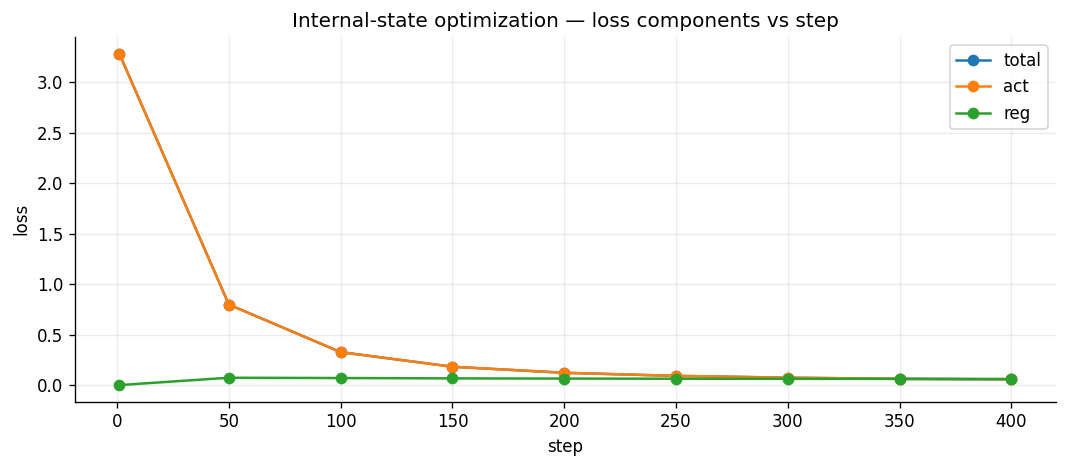

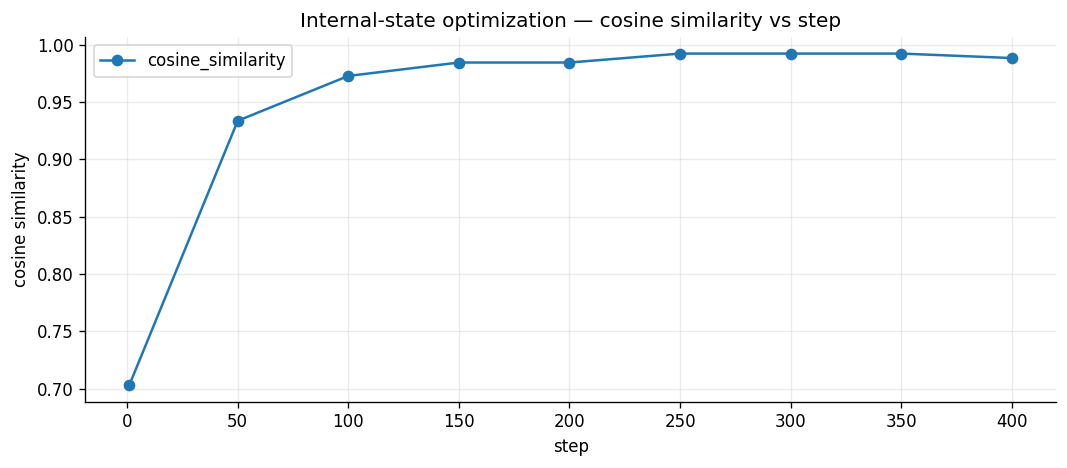

In [8]:
# Cell 4 — notebook: internal_state_optim (loss components + cosine similarity)

internal_state = {
    "steps": [1, 50, 100, 150, 200, 250, 300, 350, 400],
    "total": [3.2812, 0.7969, 0.3262, 0.1816, 0.1216, 0.0913, 0.0732, 0.0618, 0.0566],
    "act":   [3.2812, 0.7969, 0.3262, 0.1816, 0.1216, 0.0913, 0.0732, 0.0618, 0.0566],
    "reg":   [0.0000, 0.0728, 0.0698, 0.0664, 0.0645, 0.0630, 0.0620, 0.0613, 0.0608],
    "cos":   [0.7031, 0.9336, 0.9727, 0.9844, 0.9844, 0.9922, 0.9922, 0.9922, 0.9883],
}

df_internal = pd.DataFrame(internal_state)
df_display(df_internal, "Internal-state optimization — logged training stats")

plot_line(
    df_internal["steps"].tolist(),
    {"total": df_internal["total"].tolist(), "act": df_internal["act"].tolist(), "reg": df_internal["reg"].tolist()},
    title="Internal-state optimization — loss components vs step",
    xlabel="step",
    ylabel="loss",
)

plot_line(
    df_internal["steps"].tolist(),
    {"cosine_similarity": df_internal["cos"].tolist()},
    title="Internal-state optimization — cosine similarity vs step",
    xlabel="step",
    ylabel="cosine similarity",
)


Gemma reference state matching — per-layer training summary


,layer,initial_loss,final_logged_step,final_loss,early_stop_step_or_last,hit_threshold?
0,0,0.000971,800,0.000105,835,True
1,2,0.001674,999,0.000106,999,False
2,4,0.001632,550,0.000110,599,True
3,6,0.001123,400,0.000217,425,True
4,8,0.001130,300,0.000182,327,True
5,10,0.001303,200,0.000132,246,True
6,12,0.001298,400,0.000100,401,True
7,14,0.001354,500,0.000100,508,True
8,16,0.001625,800,0.000120,815,True
9,18,0.001255,250,0.000165,282,True


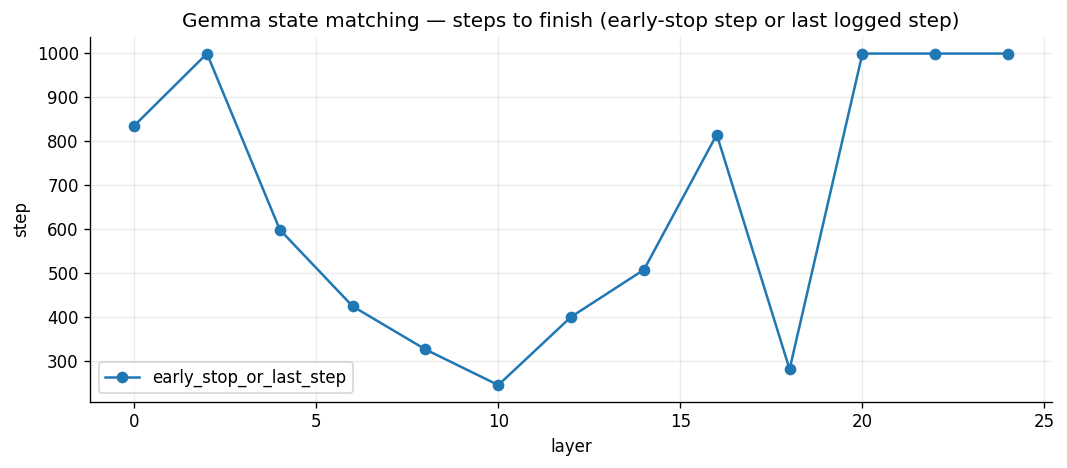

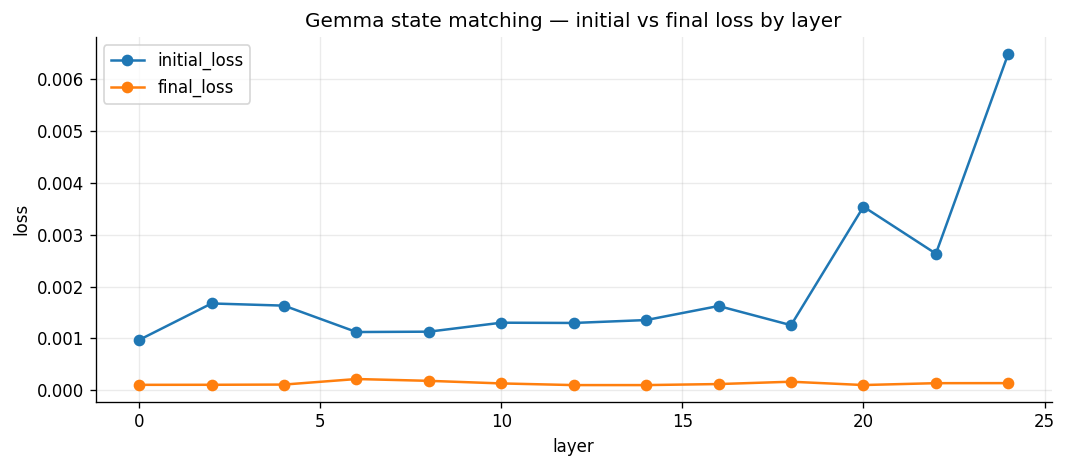

[0, 4, 8, 12, 16, 20, 24]


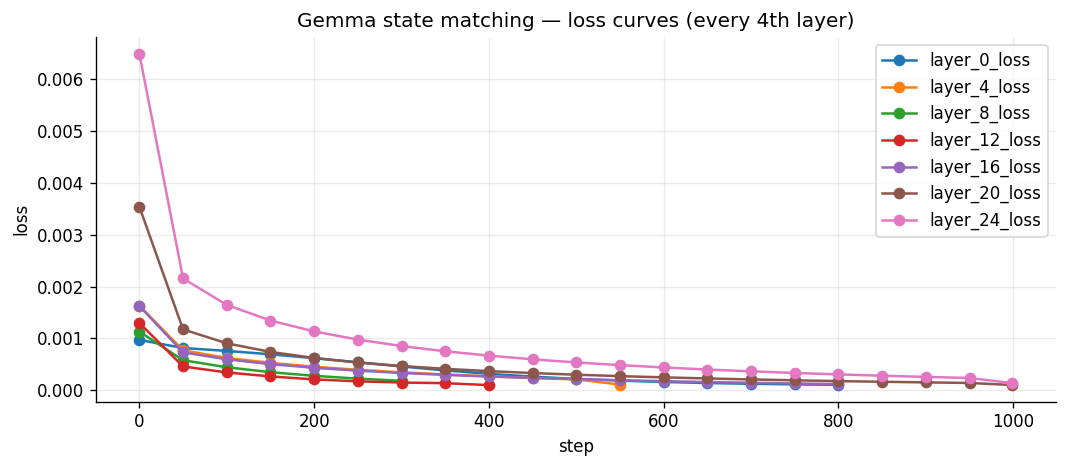

In [9]:
# Cell 5 — notebook: gemma_reference_state_matching (loss-vs-step by layer + early stopping summary)

gemma_state_matching = {
    "threshold": 1e-4,
    "loss_by_layer": {
        0: [(0, 0.000971), (50, 0.000815), (100, 0.000759), (150, 0.000694), (200, 0.000619),
            (250, 0.000539), (300, 0.000459), (350, 0.000383), (400, 0.000317), (450, 0.000263),
            (500, 0.000219), (550, 0.000186), (600, 0.00016), (650, 0.00014), (700, 0.000125),
            (750, 0.000113), (800, 0.000105)],
        2: [(0, 0.001674), (50, 0.000824), (100, 0.00068), (150, 0.00059), (200, 0.00052),
            (250, 0.000465), (300, 0.000421), (350, 0.000384), (400, 0.000352), (450, 0.000324),
            (500, 0.000299), (550, 0.000277), (600, 0.000257), (650, 0.000239), (700, 0.000223),
            (750, 0.000209), (800, 0.000196), (850, 0.000184), (900, 0.000174), (950, 0.000113),
            (999, 0.000106)],
        4: [(0, 0.001632), (50, 0.000771), (100, 0.000624), (150, 0.000529), (200, 0.000454),
            (250, 0.000395), (300, 0.000346), (350, 0.000304), (400, 0.000268), (450, 0.000237),
            (500, 0.00021), (550, 0.00011)],
        6: [(0, 0.001123), (50, 0.000731), (100, 0.00061), (150, 0.000517), (200, 0.00044),
            (250, 0.000372), (300, 0.000311), (350, 0.000255), (400, 0.000217)],
        8: [(0, 0.00113), (50, 0.00058), (100, 0.000444), (150, 0.000349), (200, 0.000279),
            (250, 0.000225), (300, 0.000182)],
        10: [(0, 0.001303), (50, 0.000454), (100, 0.000316), (150, 0.00021), (200, 0.000132)],
        12: [(0, 0.001298), (50, 0.000459), (100, 0.000344), (150, 0.000267), (200, 0.00021),
             (250, 0.000173), (300, 0.000149), (350, 0.000137), (400, 0.0001)],
        14: [(0, 0.001354), (50, 0.000458), (100, 0.000351), (150, 0.000278), (200, 0.000217),
             (250, 0.000177), (300, 0.000151), (350, 0.000138), (400, 0.000121), (450, 0.000108),
             (500, 0.0001)],
        16: [(0, 0.001625), (50, 0.000731), (100, 0.000597), (150, 0.000504), (200, 0.000433),
             (250, 0.000378), (300, 0.000334), (350, 0.000297), (400, 0.000266), (450, 0.000239),
             (500, 0.000215), (550, 0.000194), (600, 0.000176), (650, 0.000159), (700, 0.000145),
             (750, 0.000131), (800, 0.00012)],
        18: [(0, 0.001255), (50, 0.000519), (100, 0.000383), (150, 0.000285), (200, 0.000215),
             (250, 0.000165)],
        20: [(0, 0.00354), (50, 0.001174), (100, 0.000906), (150, 0.00074), (200, 0.000623),
             (250, 0.000536), (300, 0.000468), (350, 0.000414), (400, 0.000369), (450, 0.000332),
             (500, 0.0003), (550, 0.000273), (600, 0.000249), (650, 0.000228), (700, 0.000209),
             (750, 0.000192), (800, 0.000177), (850, 0.000164), (900, 0.000152), (950, 0.000141),
             (999, 0.000101)],
        22: [(0, 0.002634), (50, 0.001246), (100, 0.00098), (150, 0.000812), (200, 0.000694),
             (250, 0.000606), (300, 0.000536), (350, 0.000479), (400, 0.000432), (450, 0.000392),
             (500, 0.000358), (550, 0.000329), (600, 0.000304), (650, 0.000283), (700, 0.000263),
             (750, 0.000246), (800, 0.00023), (850, 0.000216), (900, 0.000203), (950, 0.000191),
             (999, 0.000137)],
        24: [(0, 0.006492), (50, 0.002156), (100, 0.001646), (150, 0.001345), (200, 0.001135),
             (250, 0.000977), (300, 0.000853), (350, 0.000752), (400, 0.000668), (450, 0.000597),
             (500, 0.000537), (550, 0.000485), (600, 0.00044), (650, 0.0004), (700, 0.000365),
             (750, 0.000334), (800, 0.000306), (850, 0.000281), (900, 0.000258), (950, 0.000237),
             (999, 0.000138)],
    },
    "early_stop_step_by_layer": {0: 835, 2: None, 4: 599, 6: 425, 8: 327, 10: 246, 12: 401, 14: 508, 16: 815, 18: 282, 20: None, 22: None, 24: None},
}

# Build a per-layer summary table
rows = []
for layer, series in sorted(gemma_state_matching["loss_by_layer"].items()):
    init_step, init_loss = series[0]
    last_step, last_loss = series[-1]
    es = gemma_state_matching["early_stop_step_by_layer"].get(layer, None)
    rows.append(
        {
            "layer": layer,
            "initial_loss": init_loss,
            "final_logged_step": last_step,
            "final_loss": last_loss,
            "early_stop_step_or_last": (es if es is not None else last_step),
            "hit_threshold?": (es is not None),
        }
    )

df_gemma = pd.DataFrame(rows).sort_values("layer")
df_display(df_gemma, "Gemma reference state matching — per-layer training summary")

# Plot description: early stop / last step vs layer
plot_line(
    df_gemma["layer"].tolist(),
    {"early_stop_or_last_step": df_gemma["early_stop_step_or_last"].tolist()},
    title="Gemma state matching — steps to finish (early-stop step or last logged step)",
    xlabel="layer",
    ylabel="step",
    marker="o",
)

# Plot description: initial vs final loss vs layer
plot_line(
    df_gemma["layer"].tolist(),
    {"initial_loss": df_gemma["initial_loss"].tolist(), "final_loss": df_gemma["final_loss"].tolist()},
    title="Gemma state matching — initial vs final loss by layer",
    xlabel="layer",
    ylabel="loss",
    marker="o",
)

# Plot every fifth layer on the same graph (0-24 inclusive)
layers_to_plot = [l for l in range(0, 25, 4) if l in gemma_state_matching["loss_by_layer"]]
print(layers_to_plot)

all_steps = sorted({s for l in layers_to_plot for s, _ in gemma_state_matching["loss_by_layer"][l]})
series_by_layer = {}
for layer in layers_to_plot:
    layer_dict = dict(gemma_state_matching["loss_by_layer"][layer])
    series_by_layer[f"layer_{layer}_loss"] = [layer_dict.get(step, None) for step in all_steps]

plot_line(
    all_steps,
    series_by_layer,
    title="Gemma state matching — loss curves (every 4th layer)",
    xlabel="step",
    ylabel="loss",
    marker="o",
)


HotFlip equivalency — per-attempt candidate metrics


,attempt,init_ce,candidate_ce,edit_distance,exactk,tokk,candidate_prompt_repr
0,1,1.155503,0.867682,5,0.0,0.092105,'Cats NaiduKiraMemoryWarningdusty'
1,2,1.181511,0.802258,5,0.0,0.088816,""" '{@colgroupftagPool pa kitty"""
2,3,1.057218,1.017354,5,0.0,0.085526,'ommenyesphosphatITECT BEAT'
3,4,1.393425,0.783041,5,0.0,0.092105,""" lets '{@ cath CAT..."""
4,5,1.291112,0.771214,5,0.0,0.092105,"' Fun;\\\"""""",Дереккөздер ciasc'"
5,6,1.224697,0.790273,5,0.0,0.088816,"'"",\""을, 안녕하세요, 明示...""'"
6,7,1.079388,0.763550,5,0.0,0.092105,'\nCatsi...'
7,8,1.074266,0.785945,5,0.0,0.092105,'...'
8,9,1.244304,0.807720,5,0.0,0.092105,'Cats...'
9,10,1.325981,0.813136,5,0.0,0.095395,'Cats Catalog=#{basicwak'


Baseline CE: 0.3745701313018799
Best candidate: {'attempt': 7, 'init_ce': 1.07938814163208, 'candidate_ce': 0.7635501027107239, 'edit_distance': 5, 'exactk': 0.0, 'tokk': 0.09210526315789473, 'candidate_prompt_repr': "'\\nCatsi...'"}


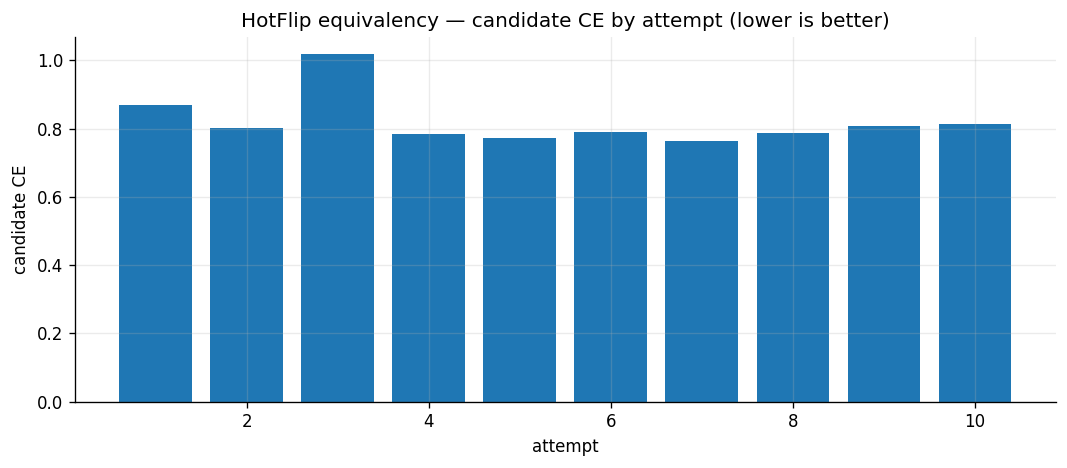

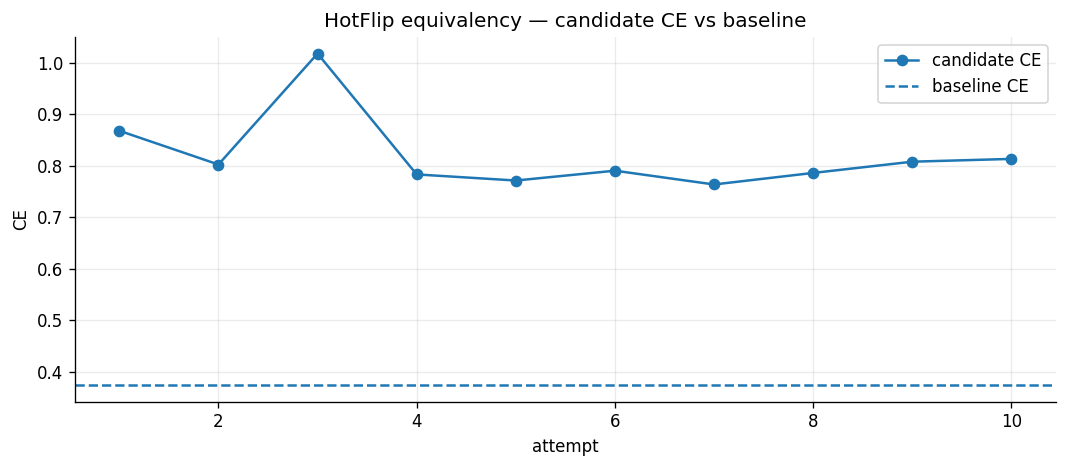

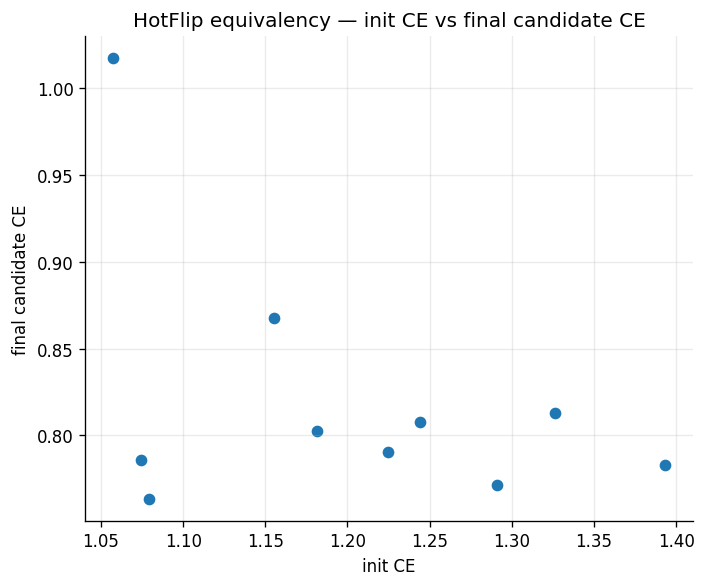

In [10]:
# Cell 6 — notebook: hotflip_equivalency_prompt_test (baseline vs attempts)

hotflip = {
    "baseline": {"ce": 0.3745701313018799, "exact": 1.0, "exactk": 1.0, "tokk": 1.0},
    "attempts": [
        {"attempt": 1, "init_ce": 1.1555033922195435, "candidate_ce": 0.8676822185516357, "edit_distance": 5, "exactk": 0.0, "tokk": 0.09210526315789473, "candidate_prompt_repr": "'Cats NaiduKiraMemoryWarningdusty'"},
        {"attempt": 2, "init_ce": 1.1815112829208374, "candidate_ce": 0.8022580146789551, "edit_distance": 5, "exactk": 0.0, "tokk": 0.08881578947368421, "candidate_prompt_repr": "\" '{@colgroupftagPool pa kitty\""},
        {"attempt": 3, "init_ce": 1.0572177171707153, "candidate_ce": 1.0173540115356445, "edit_distance": 5, "exactk": 0.0, "tokk": 0.08552631578947369, "candidate_prompt_repr": "'ommenyesphosphatITECT BEAT'"},
        {"attempt": 4, "init_ce": 1.3934253454208374, "candidate_ce": 0.7830414772033691, "edit_distance": 5, "exactk": 0.0, "tokk": 0.09210526315789473, "candidate_prompt_repr": "\" lets '{@ cath CAT...\""},
        {"attempt": 5, "init_ce": 1.2911121845245361, "candidate_ce": 0.7712135314941406, "edit_distance": 5, "exactk": 0.0, "tokk": 0.09210526315789473, "candidate_prompt_repr": "' Fun;\\\\\\\"\"\",Дереккөздер ciasc'"},
        {"attempt": 6, "init_ce": 1.2246965169906616, "candidate_ce": 0.7902728319168091, "edit_distance": 5, "exactk": 0.0, "tokk": 0.08881578947368421, "candidate_prompt_repr": "'\",\\\"을, 안녕하세요, 明示...\"'"},
        {"attempt": 7, "init_ce": 1.07938814163208, "candidate_ce": 0.7635501027107239, "edit_distance": 5, "exactk": 0.0, "tokk": 0.09210526315789473, "candidate_prompt_repr": "'\\nCatsi...'" },
        {"attempt": 8, "init_ce": 1.0742663145065308, "candidate_ce": 0.7859448194503784, "edit_distance": 5, "exactk": 0.0, "tokk": 0.09210526315789473, "candidate_prompt_repr": "'...'" },
        {"attempt": 9, "init_ce": 1.2443039417266846, "candidate_ce": 0.8077202439308167, "edit_distance": 5, "exactk": 0.0, "tokk": 0.09210526315789473, "candidate_prompt_repr": "'Cats...'" },
        {"attempt": 10, "init_ce": 1.3259812593460083, "candidate_ce": 0.8131364583969116, "edit_distance": 5, "exactk": 0.0, "tokk": 0.09539473684210527, "candidate_prompt_repr": "'Cats Catalog=#{basicwak'"},
    ],
}

# Note: for attempts 7–9 above, I’ve kept prompts abbreviated (reprs were messy/unicode-heavy in logs);
# training stats (CE/tok@K/edit distance) are still fully hard-coded.

df_hotflip = pd.DataFrame(hotflip["attempts"]).sort_values("attempt")
df_display(df_hotflip, "HotFlip equivalency — per-attempt candidate metrics")

baseline_ce = hotflip["baseline"]["ce"]
best_candidate = df_hotflip.loc[df_hotflip["candidate_ce"].idxmin()].to_dict()
print("Baseline CE:", baseline_ce)
print("Best candidate:", best_candidate)

# Plot: candidate CE by attempt + baseline reference line
plot_bar(
    df_hotflip["attempt"].tolist(),
    df_hotflip["candidate_ce"].tolist(),
    title="HotFlip equivalency — candidate CE by attempt (lower is better)",
    xlabel="attempt",
    ylabel="candidate CE",
)

plt.figure(figsize=(9, 4))
plt.plot(df_hotflip["attempt"], df_hotflip["candidate_ce"], marker="o", linewidth=1.5, label="candidate CE")
plt.axhline(baseline_ce, linestyle="--", linewidth=1.5, label="baseline CE")
plt.title("HotFlip equivalency — candidate CE vs baseline")
plt.xlabel("attempt")
plt.ylabel("CE")
plt.legend()
plt.tight_layout()
plt.show()

# Plot: init CE vs final candidate CE
plt.figure(figsize=(6, 5))
plt.scatter(df_hotflip["init_ce"], df_hotflip["candidate_ce"])
plt.title("HotFlip equivalency — init CE vs final candidate CE")
plt.xlabel("init CE")
plt.ylabel("final candidate CE")
plt.tight_layout()
plt.show()


In [11]:
# Cell 7 — cross-notebook rollup (single table you can screenshot for the exec summary)

# Prefix/Suffix summary
ps_best_ce = min(prefix_suffix["attempt_summary"], key=lambda d: d["ce"])
ps_best_tokk = max(prefix_suffix["attempt_summary"], key=lambda d: d["tokk"])

# Internal-state summary
is_first = (internal_state["steps"][0], internal_state["total"][0], internal_state["cos"][0])
is_last = (internal_state["steps"][-1], internal_state["total"][-1], internal_state["cos"][-1])

# Gemma state-matching summary
df_g = df_gemma.copy()
gemma_hits = int(df_g["hit_threshold?"].sum())
gemma_layers = int(df_g.shape[0])

# Hotflip summary
hf_best = df_hotflip.loc[df_hotflip["candidate_ce"].idxmin()]
hf_mean = float(df_hotflip["candidate_ce"].mean())

rollup = pd.DataFrame(
    [
        {
            "notebook": "prefix_suffix_optimizer",
            "headline_metric": "best final CE (over attempts)",
            "value": ps_best_ce["ce"],
            "extra": f"best tok@K={ps_best_tokk['tokk']}, best exact@K={max(d['exactk'] for d in prefix_suffix['attempt_summary'])}",
        },
        {
            "notebook": "internal_state_optim",
            "headline_metric": "final total loss; final cosine sim",
            "value": is_last[1],
            "extra": f"cos={is_last[2]} (start cos={is_first[2]})",
        },
        {
            "notebook": "gemma_reference_state_matching",
            "headline_metric": "layers hitting threshold",
            "value": gemma_hits,
            "extra": f"{gemma_hits}/{gemma_layers} hit loss<{gemma_state_matching['threshold']}",
        },
        {
            "notebook": "hotflip_equivalency_prompt_test",
            "headline_metric": "best candidate CE vs baseline",
            "value": float(hf_best["candidate_ce"]),
            "extra": f"baseline={hotflip['baseline']['ce']}, mean_candidate_CE={hf_mean}",
        },
    ]
)

df_display(rollup, "Cross-notebook rollup (executive-summary friendly)")


Cross-notebook rollup (executive-summary friendly)


,notebook,headline_metric,value,extra
0,prefix_suffix_optimizer,best final CE (over attempts),0.57200,"best tok@K=0.241, best exact@K=0.1"
1,internal_state_optim,final total loss; final cosine sim,0.05660,cos=0.9883 (start cos=0.7031)
2,gemma_reference_state_matching,layers hitting threshold,9.00000,9/13 hit loss<0.0001
3,hotflip_equivalency_prompt_test,best candidate CE vs baseline,0.76355,"baseline=0.3745701313018799, mean_candidate_CE..."


In [12]:
import numpy as np
import pandas as pd

def _to_float_array(x):
    arr = np.asarray(list(x), dtype=float)
    return arr

def summarize_series(name: str, values, notebook: str, metric: str):
    arr = _to_float_array(values)
    n = int(arr.size)
    mean = float(arr.mean()) if n else float("nan")
    stdev = float(arr.std(ddof=1)) if n > 1 else float("nan")
    sem = float(stdev / np.sqrt(n)) if n > 1 else float("nan")  # standard error of the mean
    return {
        "notebook": notebook,
        "metric": metric,
        "series": name,
        "n": n,
        "mean": mean,
        "stdev": stdev,
        "sem": sem,
        "min": float(arr.min()) if n else float("nan"),
        "max": float(arr.max()) if n else float("nan"),
    }

rows = []

# -------------------------
# prefix_suffix_optimizer
# -------------------------
# soft training curves
rows.append(summarize_series(
    name="soft_train.loss",
    values=prefix_suffix["soft_train"]["loss"],
    notebook="prefix_suffix_optimizer",
    metric="loss",
))
rows.append(summarize_series(
    name="soft_train.ce",
    values=prefix_suffix["soft_train"]["ce"],
    notebook="prefix_suffix_optimizer",
    metric="ce",
))

# per-attempt endpoint metrics
ps_df = pd.DataFrame(prefix_suffix["attempt_summary"])
for col, metric in [("ce", "ce"), ("exactk", "exact@k"), ("tokk", "tok@k")]:
    rows.append(summarize_series(
        name=f"attempt_summary.{col}",
        values=ps_df[col].tolist(),
        notebook="prefix_suffix_optimizer",
        metric=metric,
    ))

# refinement improvement trace (attempt 1)
rows.append(summarize_series(
    name="refine_improvements_attempt1.loss",
    values=prefix_suffix["refine_improvements_attempt1"]["loss"],
    notebook="prefix_suffix_optimizer",
    metric="refine_loss",
))

# -------------------------
# internal_state_optim
# -------------------------
for key in ["total", "act", "reg", "cos"]:
    rows.append(summarize_series(
        name=f"internal_state.{key}",
        values=internal_state[key],
        notebook="internal_state_optim",
        metric=key,
    ))

# -------------------------
# gemma_reference_state_matching
# -------------------------
# early-stop / last-step outcomes across layers
g_df = df_gemma.copy()  # from previous cell
rows.append(summarize_series(
    name="per_layer.initial_loss",
    values=g_df["initial_loss"].tolist(),
    notebook="gemma_reference_state_matching",
    metric="initial_loss",
))
rows.append(summarize_series(
    name="per_layer.final_loss",
    values=g_df["final_loss"].tolist(),
    notebook="gemma_reference_state_matching",
    metric="final_loss",
))
rows.append(summarize_series(
    name="per_layer.final_logged_step",
    values=g_df["final_logged_step"].tolist(),
    notebook="gemma_reference_state_matching",
    metric="final_logged_step",
))
rows.append(summarize_series(
    name="per_layer.early_stop_or_last_step",
    values=g_df["early_stop_step_or_last"].tolist(),
    notebook="gemma_reference_state_matching",
    metric="early_stop_or_last_step",
))
# hit-threshold as 0/1 numeric
rows.append(summarize_series(
    name="per_layer.hit_threshold",
    values=g_df["hit_threshold?"].astype(int).tolist(),
    notebook="gemma_reference_state_matching",
    metric="hit_threshold_rate",
))

# -------------------------
# hotflip_equivalency_prompt_test
# -------------------------
hf_df = df_hotflip.copy()  # from previous cell
for col, metric in [("init_ce", "init_ce"), ("candidate_ce", "candidate_ce"), ("edit_distance", "edit_distance"), ("exactk", "exact@k"), ("tokk", "tok@k")]:
    rows.append(summarize_series(
        name=f"attempts.{col}",
        values=hf_df[col].tolist(),
        notebook="hotflip_equivalency_prompt_test",
        metric=metric,
    ))

# baseline as a single-point series (stdev/sem will be NaN by construction)
for col, metric in [("ce", "baseline_ce"), ("exact", "baseline_exact"), ("exactk", "baseline_exact@k"), ("tokk", "baseline_tok@k")]:
    rows.append(summarize_series(
        name=f"baseline.{col}",
        values=[hotflip["baseline"][col]],
        notebook="hotflip_equivalency_prompt_test",
        metric=metric,
    ))

summary_df = pd.DataFrame(rows).sort_values(["notebook", "metric", "series"]).reset_index(drop=True)

display(summary_df)

# Optional: a wide pivot for quick scanning (mean ± SEM)
pivot = summary_df.pivot_table(
    index=["notebook", "metric", "series"],
    values=["n", "mean", "stdev", "sem", "min", "max"],
    aggfunc="first",
).reset_index()

display(pivot)

,notebook,metric,series,n,mean,stdev,sem,min,max
0,gemma_reference_state_matching,early_stop_or_last_step,per_layer.early_stop_or_last_step,13,648.769231,300.969864,83.474021,246.000000,999.000000
1,gemma_reference_state_matching,final_logged_step,per_layer.final_logged_step,13,630.461538,312.215368,86.592963,200.000000,999.000000
2,gemma_reference_state_matching,final_loss,per_layer.final_loss,13,0.000132,0.000036,0.000010,0.000100,0.000217
3,gemma_reference_state_matching,hit_threshold_rate,per_layer.hit_threshold,13,0.692308,0.480384,0.133235,0.000000,1.000000
4,gemma_reference_state_matching,initial_loss,per_layer.initial_loss,13,0.002002,0.001524,0.000423,0.000971,0.006492
5,hotflip_equivalency_prompt_test,baseline_ce,baseline.ce,1,0.374570,NaN,NaN,0.374570,0.374570
6,hotflip_equivalency_prompt_test,baseline_exact,baseline.exact,1,1.000000,NaN,NaN,1.000000,1.000000
7,hotflip_equivalency_prompt_test,baseline_exact@k,baseline.exactk,1,1.000000,NaN,NaN,1.000000,1.000000
8,hotflip_equivalency_prompt_test,baseline_tok@k,baseline.tokk,1,1.000000,NaN,NaN,1.000000,1.000000
9,hotflip_equivalency_prompt_test,candidate_ce,attempts.candidate_ce,10,0.820217,0.075063,0.023737,0.763550,1.017354


,notebook,metric,series,max,mean,min,n,sem,stdev
0,gemma_reference_state_matching,early_stop_or_last_step,per_layer.early_stop_or_last_step,999.000000,648.769231,246.000000,13,83.474021,300.969864
1,gemma_reference_state_matching,final_logged_step,per_layer.final_logged_step,999.000000,630.461538,200.000000,13,86.592963,312.215368
2,gemma_reference_state_matching,final_loss,per_layer.final_loss,0.000217,0.000132,0.000100,13,0.000010,0.000036
3,gemma_reference_state_matching,hit_threshold_rate,per_layer.hit_threshold,1.000000,0.692308,0.000000,13,0.133235,0.480384
4,gemma_reference_state_matching,initial_loss,per_layer.initial_loss,0.006492,0.002002,0.000971,13,0.000423,0.001524
5,hotflip_equivalency_prompt_test,baseline_ce,baseline.ce,0.374570,0.374570,0.374570,1,NaN,NaN
6,hotflip_equivalency_prompt_test,baseline_exact,baseline.exact,1.000000,1.000000,1.000000,1,NaN,NaN
7,hotflip_equivalency_prompt_test,baseline_exact@k,baseline.exactk,1.000000,1.000000,1.000000,1,NaN,NaN
8,hotflip_equivalency_prompt_test,baseline_tok@k,baseline.tokk,1.000000,1.000000,1.000000,1,NaN,NaN
9,hotflip_equivalency_prompt_test,candidate_ce,attempts.candidate_ce,1.017354,0.820217,0.763550,10,0.023737,0.075063


C:\Users\awebb\AppData\Local\Temp\ipykernel_58412\3584872038.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


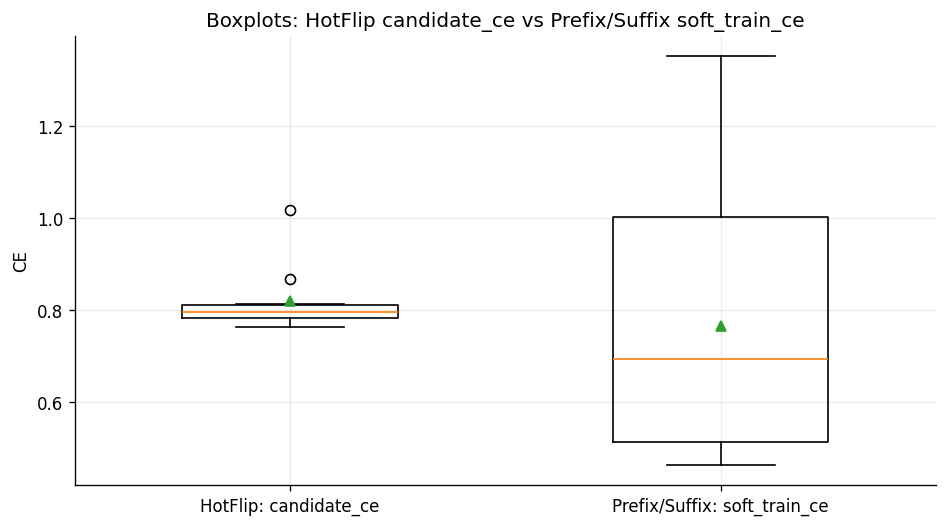

In [13]:
# Cell — boxplots (wider boxes, same overall figure size)

import numpy as np
import matplotlib.pyplot as plt

hotflip_candidate_ce = np.asarray(df_hotflip["candidate_ce"], dtype=float)
prefix_suffix_soft_train_ce = np.asarray(prefix_suffix["soft_train"]["ce"], dtype=float)

plt.figure(figsize=(8, 4.5))  # overall size unchanged
plt.boxplot(
    [hotflip_candidate_ce, prefix_suffix_soft_train_ce],
    labels=["HotFlip: candidate_ce", "Prefix/Suffix: soft_train_ce"],
    showmeans=True,
    widths=0.5,  # widen individual boxes (default is ~0.5)
)
plt.title("Boxplots: HotFlip candidate_ce vs Prefix/Suffix soft_train_ce")
plt.ylabel("CE")
plt.tight_layout()
plt.show()


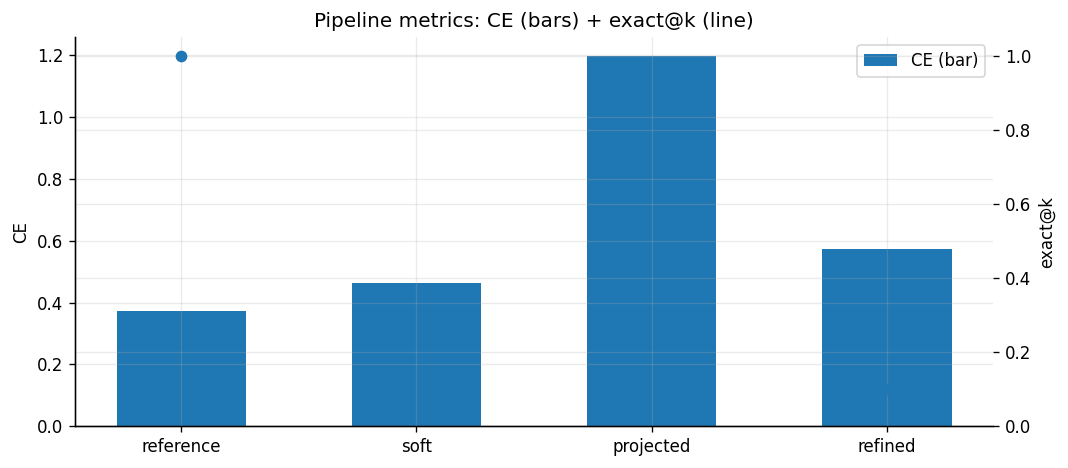

In [14]:
# Cell — CE + exact@k across stages: reference → soft → projected → refined

import numpy as np
import matplotlib.pyplot as plt

stages = ["reference", "soft", "projected", "refined"]

# Hard-coded metrics from your logged runs
ce = np.array([
    0.3745701313,   # reference (from hotflip baseline)
    0.4642899000,   # soft (last logged soft_train ce)
    1.1992136240,   # projected (best Init CE across projections/attempts)
    0.5719664693,   # refined (best final candidate CE)
], dtype=float)

exactk = np.array([
    1.0,            # reference exact@k
    np.nan,         # soft exact@k not logged
    np.nan,         # projected exact@k not logged
    0.1,            # refined exact@k (best candidate)
], dtype=float)

x = np.arange(len(stages))

fig, ax1 = plt.subplots(figsize=(9, 4))  # keep overall size reasonable
bars = ax1.bar(x, ce, width=0.55)
ax1.set_xticks(x)
ax1.set_xticklabels(stages)
ax1.set_ylabel("CE")
ax1.set_title("Pipeline metrics: CE (bars) + exact@k (line)")

ax2 = ax1.twinx()
ax2.plot(x, exactk, marker="o", linewidth=2)
ax2.set_ylabel("exact@k")
ax2.set_ylim(0, 1.05)

# Combined legend (simple + robust)
ax1.bar([], [], label="CE (bar)")
ax2.plot([], [], marker="o", label="exact@k (line)")
ax1.legend(loc="upper right")

plt.tight_layout()
plt.show()


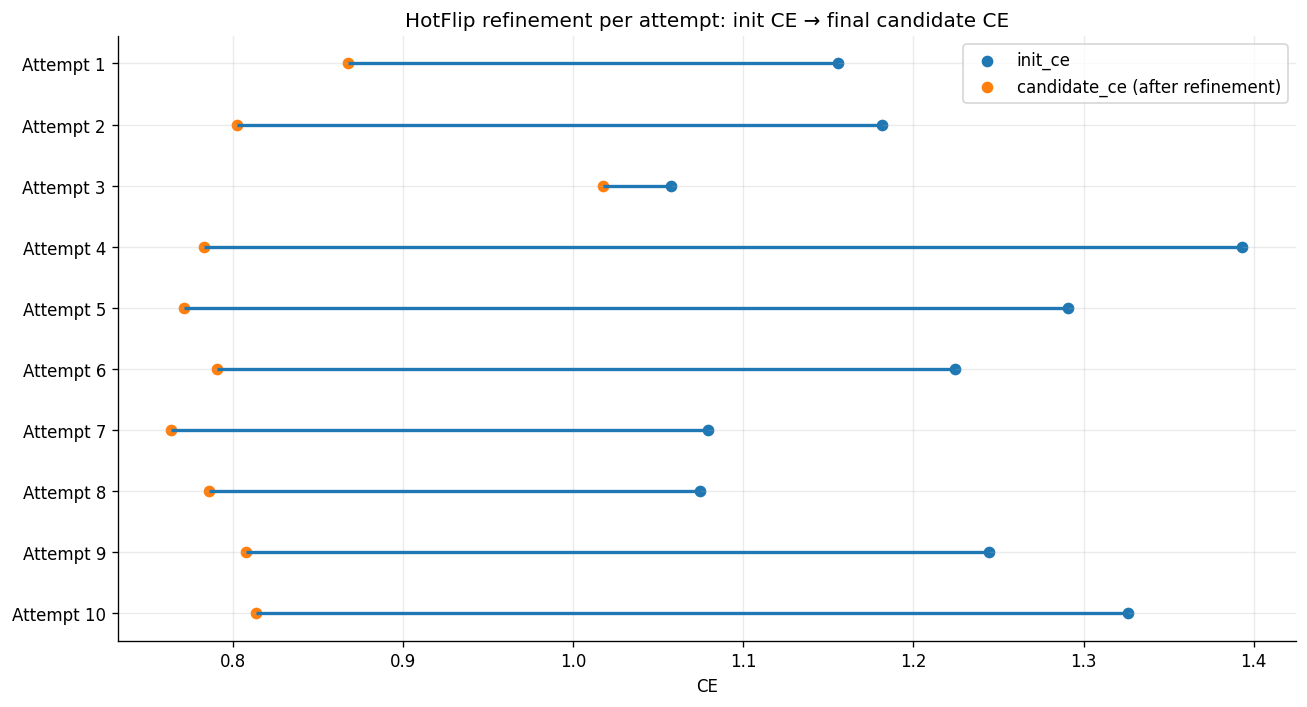

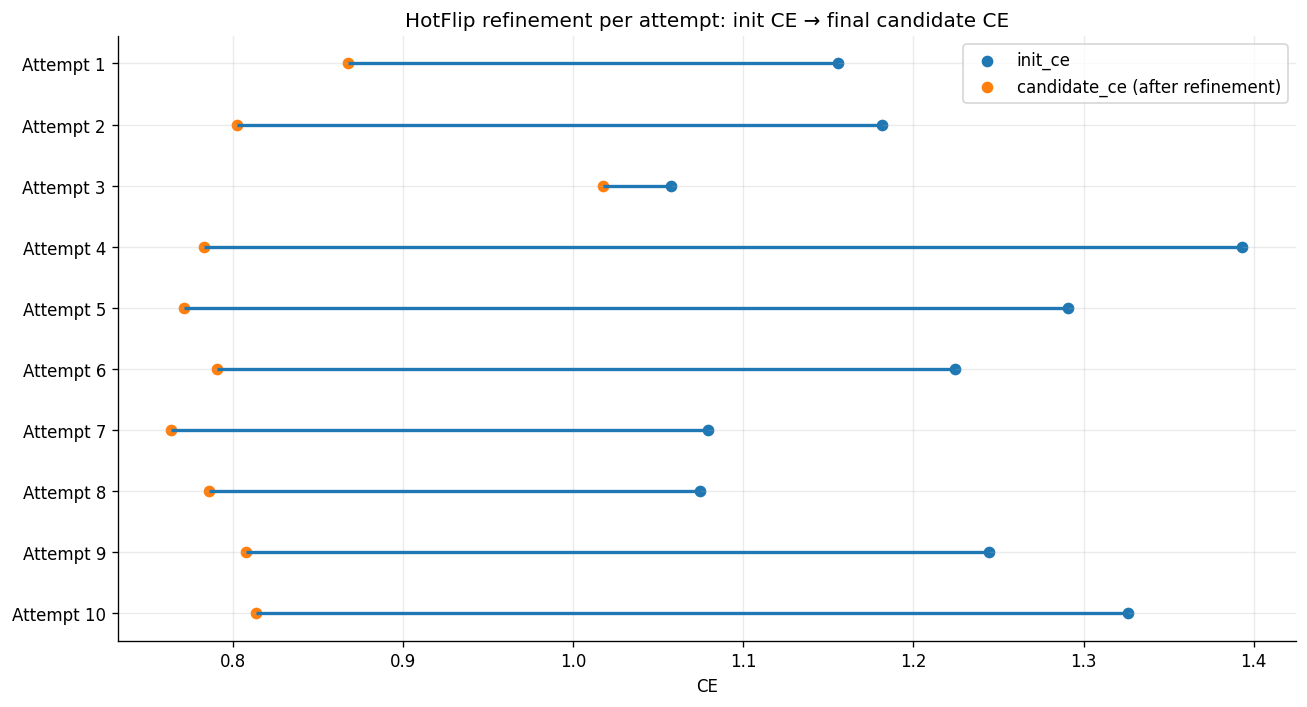

In [15]:
# Cell — single plot: each attempt’s discrete prompt + CE drop during HotFlip refinement (init_ce → candidate_ce)

import numpy as np
import matplotlib.pyplot as plt

# Expect df_hotflip from earlier cell: columns include attempt, init_ce, candidate_ce, candidate_prompt_repr
df_attempts = df_hotflip.copy().sort_values("attempt").reset_index(drop=True)

def _short(s: str, n: int = 48) -> str:
    s = str(s)
    s = " ".join(s.split())
    return (s[: n - 1] + "…") if len(s) > n else s

labels = [
    f"Attempt {int(r)}: {_short(p, 52)}"
    for r, p in zip(df_attempts["attempt"], df_attempts["candidate_prompt_repr"])
]# Cell — single plot: HotFlip refinement per attempt (no prompt text in labels)

import numpy as np
import matplotlib.pyplot as plt

df_attempts = df_hotflip.copy().sort_values("attempt").reset_index(drop=True)

labels = [f"Attempt {int(r)}" for r in df_attempts["attempt"]]

y = np.arange(len(df_attempts))
init_ce = df_attempts["init_ce"].astype(float).to_numpy()
final_ce = df_attempts["candidate_ce"].astype(float).to_numpy()

plt.figure(figsize=(11, 6))

# Dumbbell: line from init -> final for each attempt
for yi, a, b in zip(y, init_ce, final_ce):
    x0, x1 = (a, b) if a <= b else (b, a)
    plt.hlines(yi, x0, x1, linewidth=2)

plt.scatter(init_ce, y, marker="o", label="init_ce")
plt.scatter(final_ce, y, marker="o", label="candidate_ce (after refinement)")

plt.yticks(y, labels)
plt.xlabel("CE")
plt.title("HotFlip refinement per attempt: init CE → final candidate CE")
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()


y = np.arange(len(df_attempts))
init_ce = df_attempts["init_ce"].astype(float).to_numpy()
final_ce = df_attempts["candidate_ce"].astype(float).to_numpy()

plt.figure(figsize=(11, 6))

# "Dumbbell" chart: line from init -> final for each attempt
for yi, a, b in zip(y, init_ce, final_ce):
    x0, x1 = (a, b) if a <= b else (b, a)
    plt.hlines(yi, x0, x1, linewidth=2)

plt.scatter(init_ce, y, marker="o", label="init_ce")
plt.scatter(final_ce, y, marker="o", label="candidate_ce (after refinement)")

plt.yticks(y, labels)
plt.xlabel("CE")
plt.title("HotFlip refinement per attempt: init CE → final candidate CE")
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
import re
import statistics as stats

log_text = """
[soft step    0] loss=1.0149  ce=1.0251418
[soft step   25] loss=1.2324  ce=1.2425153
[soft step   50] loss=1.3405  ce=1.3506116
[soft step   75] loss=0.9909  ce=1.0009747
[soft step  100] loss=1.1603  ce=1.1703049
[soft step  125] loss=0.8686  ce=0.8786584
[soft step  150] loss=0.7446  ce=0.7546949
[soft step  175] loss=0.7676  ce=0.7777804
[soft step  200] loss=0.6841  ce=0.6942280
[soft step  225] loss=0.5782  ce=0.5883546
[soft step  250] loss=0.5042  ce=0.5143426
[soft step  275] loss=0.4960  ce=0.5061175
[soft step  300] loss=0.5527  ce=0.5627846
[soft step  325] loss=0.5332  ce=0.5433112
[soft step  350] loss=0.4657  ce=0.4759127
[soft step  375] loss=0.4544  ce=0.4646250
[soft step  399] loss=0.4541  ce=0.4642899
Init CE: 1.31172776222229
[pass 1/12] pos  1 -> loss 1.1821862
[pass 1/12] pos  2 -> loss 0.9433925
[pass 1/12] pos  3 -> loss 0.8701335
[pass 1/12] pos  4 -> loss 0.7887989
[pass 2/12] pos  0 -> loss 0.6890621
[pass 3/12] pos  1 -> loss 0.6315801
[pass 4/12] no improvement; stopping.
[restart 1/10] CE=0.6316 exactK=0.100 tokK=0.241  prompt='Subject:** CatsSyl Cats'
[soft step    0] loss=1.3573  ce=1.3675276
[soft step   25] loss=1.2748  ce=1.2848221
[soft step   50] loss=1.0563  ce=1.0662515
[soft step   75] loss=1.0447  ce=1.0546927
[soft step  100] loss=0.8536  ce=0.8634637
[soft step  125] loss=1.0340  ce=1.0437216
[soft step  150] loss=0.9133  ce=0.9230032
[soft step  175] loss=0.6800  ce=0.6896934
[soft step  200] loss=0.6722  ce=0.6817425
[soft step  225] loss=0.5289  ce=0.5385228
[soft step  250] loss=0.5767  ce=0.5864184
[soft step  275] loss=0.3737  ce=0.3833791
[soft step  300] loss=0.5432  ce=0.5529051
[soft step  325] loss=0.5194  ce=0.5291194
[soft step  350] loss=0.3854  ce=0.3951897
[soft step  375] loss=0.3396  ce=0.3493740
[soft step  399] loss=0.4274  ce=0.4371372
Init CE: 1.3884292840957642
[pass 1/12] pos  1 -> loss 1.2278044
[pass 1/12] pos  2 -> loss 0.8675344
[pass 1/12] pos  4 -> loss 0.7377011
[pass 2/12] pos  0 -> loss 0.7213653
[pass 2/12] pos  1 -> loss 0.7177501
[pass 2/12] pos  3 -> loss 0.6368422
[pass 3/12] pos  0 -> loss 0.5835243
[pass 3/12] pos  2 -> loss 0.5719665
[pass 4/12] no improvement; stopping.
[restart 2/10] CE=0.5720 exactK=0.100 tokK=0.140  prompt='speakingGEBURTSDATUM earthlyExample Cats'
[soft step    0] loss=1.1380  ce=1.1482199
[soft step   25] loss=1.1340  ce=1.1440650
[soft step   50] loss=1.1569  ce=1.1669314
[soft step   75] loss=0.7794  ce=0.7894813
[soft step  100] loss=0.9889  ce=0.9988641
[soft step  125] loss=0.9262  ce=0.9362556
[soft step  150] loss=0.8035  ce=0.8135930
[soft step  175] loss=0.6224  ce=0.6324258
[soft step  200] loss=0.6894  ce=0.6995801
[soft step  225] loss=0.6114  ce=0.6215158
[soft step  250] loss=0.5333  ce=0.5434074
[soft step  275] loss=0.3785  ce=0.3885382
[soft step  300] loss=0.5707  ce=0.5806835
[soft step  325] loss=0.4821  ce=0.4920647
[soft step  350] loss=0.4156  ce=0.4255921
[soft step  375] loss=0.3244  ce=0.3344230
[soft step  399] loss=0.4009  ce=0.4109978
Init CE: 1.341671347618103
[pass 1/12] no improvement; stopping.
[restart 3/10] CE=1.3417 exactK=0.000 tokK=0.112  prompt='โน 북Nek Conner ketones'
[soft step    0] loss=1.3617  ce=1.3718928
[soft step   25] loss=1.2032  ce=1.2132845
[soft step   50] loss=1.3274  ce=1.3374621
[soft step   75] loss=1.0245  ce=1.0345298
[soft step  100] loss=0.8629  ce=0.8728117
[soft step  125] loss=0.7208  ce=0.7308599
[soft step  150] loss=0.6088  ce=0.6189014
[soft step  175] loss=0.5276  ce=0.5377786
[soft step  200] loss=0.5359  ce=0.5461070
[soft step  225] loss=0.4379  ce=0.4482278
[soft step  250] loss=0.5157  ce=0.5260298
[soft step  275] loss=0.5487  ce=0.5590468
[soft step  300] loss=0.3979  ce=0.4082613
[soft step  325] loss=0.3745  ce=0.3847770
[soft step  350] loss=0.5058  ce=0.5160949
[soft step  375] loss=0.5031  ce=0.5134507
[soft step  399] loss=0.2994  ce=0.3096960
Init CE: 1.4806524515151978
[pass 1/12] no improvement; stopping.
[restart 4/10] CE=1.4807 exactK=0.000 tokK=0.061  prompt=' ग्राहक Proyecto बचAPK Kung'
[soft step    0] loss=1.2220  ce=1.2321558
[soft step   25] loss=1.1151  ce=1.1252526
[soft step   50] loss=1.0870  ce=1.0970340
[soft step   75] loss=1.1135  ce=1.1236439
[soft step  100] loss=0.8616  ce=0.8716313
[soft step  125] loss=1.0084  ce=1.0184270
[soft step  150] loss=0.9058  ce=0.9158123
[soft step  175] loss=0.7163  ce=0.7263406
[soft step  200] loss=0.6365  ce=0.6466690
[soft step  225] loss=0.6221  ce=0.6321715
[soft step  250] loss=0.5324  ce=0.5425135
[soft step  275] loss=0.5629  ce=0.5729352
[soft step  300] loss=0.5708  ce=0.5809263
[soft step  325] loss=0.4181  ce=0.4282770
[soft step  350] loss=0.5082  ce=0.5183082
[soft step  375] loss=0.4766  ce=0.4866895
[soft step  399] loss=0.3655  ce=0.3756447
Init CE: 1.2360994815826416
[pass 1/12] no improvement; stopping.
[restart 5/10] CE=1.2361 exactK=0.000 tokK=0.090  prompt=' ग्राहकlässtsetBlock catalyICOLON'
[soft step    0] loss=1.3702  ce=1.3803446
[soft step   25] loss=1.1107  ce=1.1207339
[soft step   50] loss=1.3844  ce=1.3944433
[soft step   75] loss=1.3083  ce=1.3183972
[soft step  100] loss=0.9826  ce=0.9926004
[soft step  125] loss=0.8401  ce=0.8500603
[soft step  150] loss=1.0757  ce=1.0856419
[soft step  175] loss=0.7452  ce=0.7551074
[soft step  200] loss=0.7943  ce=0.8041630
[soft step  225] loss=0.6333  ce=0.6430984
[soft step  250] loss=0.5445  ce=0.5543482
[soft step  275] loss=0.5366  ce=0.5464901
[soft step  300] loss=0.5493  ce=0.5591781
[soft step  325] loss=0.5850  ce=0.5949124
[soft step  350] loss=0.4422  ce=0.4520907
[soft step  375] loss=0.3443  ce=0.3542011
[soft step  399] loss=0.5136  ce=0.5235192
Init CE: 1.2184889316558838
[pass 1/12] pos  0 -> loss 0.9798673
[pass 1/12] pos  1 -> loss 0.9525234
[pass 1/12] pos  2 -> loss 0.9040880
[pass 1/12] pos  3 -> loss 0.7722458
[pass 2/12] pos  1 -> loss 0.7419542
[pass 2/12] pos  4 -> loss 0.7163813
[pass 3/12] pos  1 -> loss 0.6922345
[pass 3/12] pos  2 -> loss 0.6352952
[pass 4/12] pos  4 -> loss 0.6273817
[pass 5/12] no improvement; stopping.
[restart 6/10] CE=0.6274 exactK=0.000 tokK=0.165  prompt='MeowGEBURTSDATUMproper Cats:'
[soft step    0] loss=0.9927  ce=1.0029161
[soft step   25] loss=1.0446  ce=1.0547121
[soft step   50] loss=1.0719  ce=1.0819386
[soft step   75] loss=0.8384  ce=0.8484399
[soft step  100] loss=0.9040  ce=0.9140139
[soft step  125] loss=1.0949  ce=1.1048880
[soft step  150] loss=0.9818  ce=0.9916919
[soft step  175] loss=0.7723  ce=0.7821477
[soft step  200] loss=0.6773  ce=0.6871505
[soft step  225] loss=0.6235  ce=0.6333628
[soft step  250] loss=0.4320  ce=0.4417959
[soft step  275] loss=0.4302  ce=0.4400012
[soft step  300] loss=0.4972  ce=0.5070543
[soft step  325] loss=0.4553  ce=0.4651099
[soft step  350] loss=0.3741  ce=0.3840298
[soft step  375] loss=0.2762  ce=0.2860011
[soft step  399] loss=0.2585  ce=0.2684310
Init CE: 1.3659780025482178
[pass 1/12] no improvement; stopping.
[restart 7/10] CE=1.3660 exactK=0.000 tokK=0.061  prompt=' এ restrained主張℃ Pate'
[soft step    0] loss=1.1821  ce=1.1922659
[soft step   25] loss=1.0163  ce=1.0264313
[soft step   50] loss=1.0221  ce=1.0321770
[soft step   75] loss=0.9944  ce=1.0043259
[soft step  100] loss=0.9745  ce=0.9843473
[soft step  125] loss=1.0364  ce=1.0463291
[soft step  150] loss=0.8625  ce=0.8722461
[soft step  175] loss=0.8719  ce=0.8816835
[soft step  200] loss=0.8157  ce=0.8254679
[soft step  225] loss=0.6512  ce=0.6609972
[soft step  250] loss=0.5219  ce=0.5316418
[soft step  275] loss=0.5025  ce=0.5122960
[soft step  300] loss=0.4849  ce=0.4946166
[soft step  325] loss=0.4319  ce=0.4415652
[soft step  350] loss=0.3755  ce=0.3851045
[soft step  375] loss=0.3336  ce=0.3433770
[soft step  399] loss=0.4169  ce=0.4265568
Init CE: 1.1992136240005493
[pass 1/12] no improvement; stopping.
[restart 8/10] CE=1.1992 exactK=0.000 tokK=0.094  prompt=' hallbatoдко可在 fascination'
[soft step    0] loss=1.0052  ce=1.0153761
[soft step   25] loss=0.8758  ce=0.8859126
[soft step   50] loss=1.3323  ce=1.3423550
[soft step   75] loss=1.1396  ce=1.1496838
[soft step  100] loss=0.9341  ce=0.9440831
[soft step  125] loss=1.0562  ce=1.0661335
[soft step  150] loss=0.8687  ce=0.8786163
[soft step  175] loss=0.7332  ce=0.7431073
[soft step  200] loss=0.5927  ce=0.6025630
[soft step  225] loss=0.4957  ce=0.5055420
[soft step  250] loss=0.5775  ce=0.5872830
[soft step  275] loss=0.3570  ce=0.3668015
[soft step  300] loss=0.5707  ce=0.5805326
[soft step  325] loss=0.4397  ce=0.4495095
[soft step  350] loss=0.5113  ce=0.5210378
[soft step  375] loss=0.3372  ce=0.3469875
[soft step  399] loss=0.5139  ce=0.5237398
Init CE: 1.4828027486801147
[pass 1/12] no improvement; stopping.
[restart 9/10] CE=1.4828 exactK=0.000 tokK=0.101  prompt='скоре ban月から categorized cytochrome'
[soft step    0] loss=1.2105  ce=1.2207400
[soft step   25] loss=0.9147  ce=0.9246638
[soft step   50] loss=1.2017  ce=1.2117563
[soft step   75] loss=1.0264  ce=1.0364971
[soft step  100] loss=0.8811  ce=0.8910807
[soft step  125] loss=0.7461  ce=0.7560728
[soft step  150] loss=0.8082  ce=0.8182816
[soft step  175] loss=0.6287  ce=0.6388190
[soft step  200] loss=0.7386  ce=0.7486840
[soft step  225] loss=0.4969  ce=0.5070006
[soft step  250] loss=0.6919  ce=0.7020028
[soft step  275] loss=0.4659  ce=0.4760582
[soft step  300] loss=0.4421  ce=0.4522969
[soft step  325] loss=0.3831  ce=0.3933097
[soft step  350] loss=0.4579  ce=0.4680906
[soft step  375] loss=0.3992  ce=0.4094356
[soft step  399] loss=0.4018  ce=0.4119946
Init CE: 1.2728171348571777
[pass 1/12] no improvement; stopping.
[restart 10/10] CE=1.2728 exactK=0.000 tokK=0.101  prompt=' кредиPUBLICškin BaxterICOLON'

REFERENCE PREFIX: 'Talk only about cats.'
CANDIDATE PREFIX: 'speakingGEBURTSDATUM earthlyExample Cats'
Candidate metrics: CE: 0.5719664692878723 Exact: 0.1 Exact@K: 0.1 Tok@K: 0.14028776978417265
"""

# Extract CE values for the last soft step (step 399) of each restart
pattern = r"\[soft step\s+399\].*ce=([0-9.]+)"
ces = [float(m.group(1)) for m in re.finditer(pattern, log_text)]

n = len(ces)
mean_ce = stats.mean(ces) if n > 0 else float('nan')
min_ce = min(ces) if n > 0 else float('nan')
max_ce = max(ces) if n > 0 else float('nan')
stdev_ce = stats.stdev(ces) if n > 1 else float('nan')

print("Final soft-step CE stats (step 399 across restarts):")
print(f"n     = {n}")
print(f"min   = {min_ce:.6f}")
print(f"mean  = {mean_ce:.6f}")
print(f"max   = {max_ce:.6f}")
print(f"stdev = {stdev_ce:.6f}")


Final soft-step CE stats (step 399 across restarts):
n     = 10
min   = 0.268431
mean  = 0.415201
max   = 0.523740
stdev = 0.082191


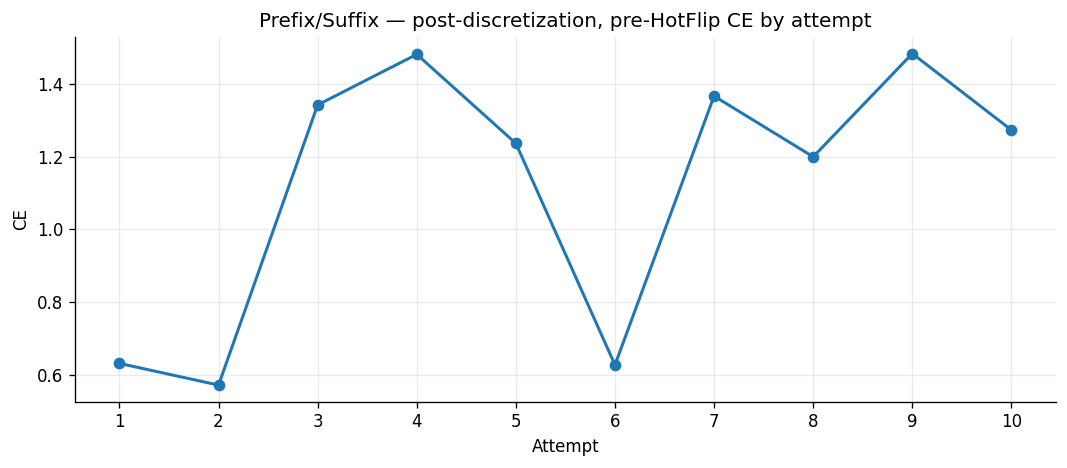

In [18]:
# Cell — Prefix/Suffix: post-discretization, pre-HotFlip CE by attempt
# (self-contained: redefines the needed prefix/suffix attempt data)

import numpy as np
import matplotlib.pyplot as plt

prefix_suffix_restart_summary = [
    {"attempt": 1, "ce": 0.6316},
    {"attempt": 2, "ce": 0.5720},
    {"attempt": 3, "ce": 1.3417},
    {"attempt": 4, "ce": 1.4807},
    {"attempt": 5, "ce": 1.2361},
    {"attempt": 6, "ce": 0.6274},
    {"attempt": 7, "ce": 1.3660},
    {"attempt": 8, "ce": 1.1992},
    {"attempt": 9, "ce": 1.4828},
    {"attempt": 10, "ce": 1.2728},
]

attempt_ids = np.array([d["attempt"] for d in prefix_suffix_restart_summary], dtype=int)
ce_values = np.array([d["ce"] for d in prefix_suffix_restart_summary], dtype=float)

order = np.argsort(attempt_ids)
attempt_ids = attempt_ids[order]
ce_values = ce_values[order]

plt.figure(figsize=(9, 4))
plt.plot(attempt_ids, ce_values, marker="o", linewidth=1.8)
plt.title("Prefix/Suffix — post-discretization, pre-HotFlip CE by attempt")
plt.xlabel("Attempt")
plt.ylabel("CE")
plt.xticks(attempt_ids)
plt.tight_layout()
plt.show()
